---
## Sorbonne Université
# <center> Mathématiques discrètes </center>
## <center> LU2IN005 </center>
## <div style="text-align:right;"> Année 2022-2023 </div>
---

---
# <center> TME programmation d'automates finis </center>
L'objectif de ce TME est de programmer en python quelques uns des
algorithmes pour les automates finis vus en cours et en TD, en
utilisant des structures de données fournies dans le code mis à votre
disposition.
---
# Consignes
Copiez dans votre répertoire de travail les fichiers présents dans le Dossier 
*Fichiers Python fournis* de la page Moodle de l'UE.

Ils contiennent les définitions de structures de données décrites
ci-dessous, ainsi que des aide-mémoire sur l'utilisation de python.

**Le seul fichier que vous êtes autorisés à modifier** est celui-ci, c'est-à-dire
`automate_etudiant.ipynb`, partiellement prérempli. 
Les instructions `return` sont à supprimer lorsque
vous remplirez le contenu des différentes fonctions.  Les autres
fichiers n'ont pas besoin d'être lus (mais ils peuvent l'être).
Si votre programme nécessite de lire des fichiers, **ceux-ci doivent être enregistrés dans le répertoire ExemplesAutomates** que vous avez téléchargé.
---

_Binôme_
----------

**NOM**: Vu        

**Prénom**: Hoang Thuy Duong              

**Numéro d'étudiant**: 21110221

**NOM**:

**Prénom**:   

**Numéro d'étudiant**: 



### Table des matières

> [1. Présentation](#sec1)
>> [1.1 La classe `State`](#sec1_1) <br>
>> [1.2 La classe `Transition`](#sec1_2) <br>
>> [1.3 La classe `Automate`](#sec1_3)

> [2. Prise en mains](#sec2)
>> [2.1 Création d'automates](#sec2_1) <br>
>> [2.2 Premières manipulations](#sec2_2) <br>

> [3. Exercices de base : tests et complétion](#sec3)

> [4. Déterminisation](#sec4)

> [5. Constructions sur les automates réalisant des opérations sur les langages acceptés](#sec5)
>> [5.1 Opérations ensemblistes sur les langages](#sec5_1) <br>
>> [5.2 Opérations rationnelles sur les langages](#sec5_2)

In [1]:
## Import des bibliothèques nécessaires au projet.
## Ne pas modifier les fichiers "bibliothèque".

## Interpréter cette cellule avant de continuer.

from transition import *
from state import *
import os
import copy
from automateBase import AutomateBase

class Automate(AutomateBase):
    pass

### 1. Présentation  <a class="anchor" id="sec1"></a>

Le projet utilise le langage python avec une syntaxe légèrement
différente de celle vue en **LU1IN001 / 011**, parce qu'il exploite en particulier
la notion de classes d'objets. Une introduction à cette notion est présentée dans le livre associé
au cours : cf [Chapitre 13](https://www-licence.ufr-info-p6.jussieu.fr/lmd/licence/2021/ue/LU1IN001-2021oct/cours2020.pdf).

De plus, le typage des variables est noté de façon légèrement différente, en commentaires, pour les déclarations
comme pour les arguments des fonctions. Pour ces derniers, les types sont indiqués dans la première ligne de la documentation de la fonction.

Les particularités sont brièvement expliquées en annexe
de ce document. Par ailleurs, vous trouverez dans la section
`projet` de la page Moodle un mémo sur la syntaxe python, ainsi que la carte de
référence du langage utilisée en **LU1IN001 / 011**.  On rappelle qu'une ligne
commençant par `#` est un commentaire, ignoré par
l'interpréteur.

Toutes les structures de données nécessaires à la construction des
automates sont fournies sous la forme de classes python, pour les
transitions d'un automate, ses états, et les automates
eux-mêmes. Cette section indique comment les utiliser.

#### 1.1 La classe `State` <a class="anchor" id="sec1_1"></a>

Un état est représenté par
- un entier `id` (type `int`) qui définit son identifiant,
- un booléen `init` (type `bool`) indiquant si c'est un état initial,
- un booléen `fin` (type `bool`) indiquant si c'est un état final,
- une chaîne de caractères `label` (type `str`) qui définit son étiquette, permettant de le *décorer*. Par défaut, cette variable est la version chaîne de caractères de l'identifiant de l'état. 

On définit l'alias de type `State` pour représenter les variables de ce type. 

Ainsi, l'instruction ci-dessous crée une variable `s` représentant un état d'identifiant `1`, qui est un état initial mais pas final, dont l'identifiant et l'étiquette  `1` :

In [2]:
# s : State
s = State(1, True, False)

Si l'on souhaite avoir une étiquette différente de l'identifiant, on
utilise un quatrième argument :

In [3]:
s = State(1, True, False, 'etat 1') 

On accède ensuite aux différents champs de `s` par la notation pointée : exécutez les cellules suivantes pour observer l'affichage obtenu.

In [4]:
print('La valeur de s.id est : ')
print(s.id)

La valeur de s.id est : 
1


In [5]:
print('La valeur de s.init est : ')
print(s.init)

La valeur de s.init est : 
True


In [6]:
print('La valeur de s.fin est : ')
print(s.fin)

La valeur de s.fin est : 
False


In [7]:
print('La valeur de s.label est : ')
print(s.label)

La valeur de s.label est : 
etat 1


In [8]:
print("L'affichage de s est : ")
print(s)

L'affichage de s est : 
etat 1(init)


Ainsi, une variable de type `State` est affichée par son étiquette et, entre parenthèses, si c'est un état initial et/ou final.

#### 1.2 La classe `Transition` <a class="anchor" id="sec1_2"></a>

Une transition est représentée par 
- un état `stateSrc` (type `State`) correspondant à son état de départ
- un caractère `etiquette` (type `str`) donnant son   étiquette
- un état `stateDest` (type `State`) correspondant à son état de destination

On définit l'alias de type `Transition` pour représenter les variables de ce type.

La séquence d'instructions suivante crée la transition d'étiquette `"a"` de l'état `s` (défini ci-dessus) vers lui-même et affiche les différents champs de la transition :

In [9]:
# t : Transition
t = Transition(s, "a", s)

In [10]:
print('La valeur de t.etiquette est : ')
print(t.etiquette)

La valeur de t.etiquette est : 
a


In [11]:
print("L'affichage de t.stateSrc est : ")
print(t.stateSrc)

L'affichage de t.stateSrc est : 
etat 1(init)


On remarque que la variable `stateSrc` est de type `State`, on obtient donc un état, et non uniquement un
identifiant d'état. 

In [12]:
print("L'affichage de t.stateDest est : ")
print(t.stateDest)

L'affichage de t.stateDest est : 
etat 1(init)


In [13]:
print("L'affichage de t est : ")
print(t)

L'affichage de t est : 
[etat 1(init)-a->etat 1(init)]


#### 1.3 La classe `Automate` <a class="anchor" id="sec1_3"></a>

Un automate est représenté par
- l'ensemble de ses transitions `allTransitions` (de type `set[Transition]`) 
- l'ensemble de ses états `allStates` (de type `set[State]`)
- une étiquette `label` (de type `str`) qui est éventuellement vide.

On définit l'alias de type `Automate` pour représenter les variables de ce type.

Ainsi, de même que pour les classes précédentes, l'accès aux
différents champs se fait par la notation pointée. Par exemple, on
obtient l'ensemble des états d'un automate `monAutomate` par
l'instruction `monAutomate.allStates`.

Pour créer un automate, il existe trois possibilités.

**Création à partir d'un ensemble de transitions.**<br>
On peut d'abord utiliser le constructeur de signature `Automate : set[Transition] -> Automate`.<br>
Il déduit alors l'ensemble des états à partir de l'ensemble des transitions et définit par défaut l'étiquette
de l'automate comme la chaîne de caractères vide.

Par exemple, en commençant par créer les états et les transitions nécessaires :

In [14]:
## création d'états
# s1 : State
s1 = State(1, True, False)
# s2 : State
s2 = State(2, False, True)

## création de transitions
# t1 : Transition
t1 = Transition(s1,"a",s1)
# t2 : Transition
t2 = Transition(s1,"a",s2)
# t3 : Transition
t3 = Transition(s1,"b",s2)
# t4 : Transition
t4 = Transition(s2,"a",s2)
# t5 : Transition
t5 = Transition(s2,"b",s2)
# set_transitions : set[Transition]
set_transitions = {t1, t2, t3, t4, t5}

## création de l'automate
# aut : Automate
aut = Automate(set_transitions)

L'affichage de cet automate, par la commande `print(aut)` produit alors le résultat suivant : 

In [15]:
print(aut)

Etats :
  1(init)
  2(fin)
Transitions :
  [1(init)-a->2(fin)]
  [1(init)-b->2(fin)]
  [2(fin)-a->2(fin)]
  [2(fin)-b->2(fin)]
  [1(init)-a->1(init)]



Les états de l'automate sont déduits de l'ensemble de transitions.

Optionnellement, on peut donner un nom à l'automate, en utilisant la variable `label`, par exemple :

In [16]:
# aut2 : Automate
aut2 = Automate(set_transitions, label="A") 

print(aut2)

Automate A
Etats :
  1(init)
  2(fin)
Transitions :
  [1(init)-a->2(fin)]
  [1(init)-b->2(fin)]
  [2(fin)-a->2(fin)]
  [2(fin)-b->2(fin)]
  [1(init)-a->1(init)]



**Création à partir d'un ensemble de transitions et d'un ensemble d'états.**<br>
Dans le second cas, on crée un automate à partir d'un ensemble de
transitions mais aussi d'un ensemble d'états, par exemple pour représenter des
automates contenant des états isolés. Pour cela, on utilise le
constructeur `Automate : set[Transition] x set[State] -> Automate`.

On peut également, optionnellement, donner un nom à l'automate :

In [17]:
# set_etats : set[State]
set_etats = {s1, s2}

# aut3 : Automate
aut3 = Automate(set_transitions, set_etats, "B")

print(aut3)

Automate B
Etats :
  1(init)
  2(fin)
Transitions :
  [1(init)-a->2(fin)]
  [1(init)-b->2(fin)]
  [2(fin)-a->2(fin)]
  [2(fin)-b->2(fin)]
  [1(init)-a->1(init)]



L'ordre des paramètres peut ne pas être respecté **à la condition** que l'on donne leur nom explicitement. Ainsi, la ligne suivante est correcte :

In [18]:
aut = Automate(setStates = set_etats, label = "A", setTransitions = set_transitions)

print(aut)

Automate A
Etats :
  1(init)
  2(fin)
Transitions :
  [1(init)-a->2(fin)]
  [1(init)-b->2(fin)]
  [2(fin)-a->2(fin)]
  [2(fin)-b->2(fin)]
  [1(init)-a->1(init)]



**Création à partir d'un fichier contenant sa description.**<br>
La fonction `Automate.creationAutomate : str -> Automate` prend en argument un nom de fichier qui décrit un automate et construit l'automate correspondant (voir exemple ci-dessous).

La description textuelle de l'automate doit suivre le format suivant (voir exemple ci-dessous) :
- #E: suivi de la liste des noms des états, séparés par
  des espaces ou des passages à la ligne. Les noms d'états peuvent
  être n'importe quelle chaîne alphanumérique pouvant également
  contenir le symbole `_`. Par contre, si le nom d'état
  contient des symboles *non numériques* il ne doit pas commencer
  par un chiffre, sous peine de provoquer une erreur à l'affichage.
  Ainsi, `10` et `A1` sont des noms d'états possibles,
  mais `1A` ne l'est pas.
- #I: suivi de la liste des états initiaux
  séparés par des espaces ou des passages à la ligne, 
- #F: suivi de la liste des
  états finaux séparés par des espaces ou des passages à la ligne, 
- #T: suivi de la liste des transitions séparées par des
  espaces ou des passages à la ligne. Chaque transition est donnée
  sous le format `(etat1, lettre, etat2)`.

Par exemple le fichier `exempleAutomate.txt` contenant <br>
`#E: 0 1 2 3`<br>
`#I: 0`<br>
`#F: 3`<br>
`#T: (0 a 0)`<br>
`	(0 b 0)`<br>
`	(0 a 1)`<br>
`	(1 a 2)`<br>
`	(2 a 3)`<br>
`	(3 a 3)`<br>
`	(3 b 3)`<br>
est formaté correctement. L'appel suivant produira l'affichage...

In [19]:
# automate : Automate
automate = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
print(automate)

Etats :
  0(init)
  1
  2
  3(fin)
Transitions :
  [0(init)-a->1]
  [0(init)-a->0(init)]
  [3(fin)-a->3(fin)]
  [0(init)-b->0(init)]
  [3(fin)-b->3(fin)]
  [2-a->3(fin)]
  [1-a->2]



**Fonctions de manipulation des automates.**<br>
La classe automate contient également de nombreuses fonctions utiles. Elles
s'appliquent à un objet de type `Automate` et s'utilisent donc sous la forme
`aut.<`*fonction*`>(<`*parametres*`>)` où `aut` est une variable de type `Automate`.


- `show : float -> NoneType` <br> 
    prend en argument facultatif un flottant (facteur de grossissement, par défaut il vaut 1.0) et produit une représentation graphique de l'automate.<br>
    Ainsi, en utilisant l'automate défini dans le fichier d'exemple précédent, l'instruction `automate.show(1.2)` produit l'image suivante :

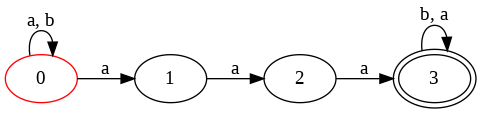

In [20]:
automate.show(1.2)

- `addTransition : Transition -> bool`<br>
  prend en argument une transition `t`, fait la mise à jour de
  l'automate en lui ajoutant `t` et ajoute les états impliqués
  dans l'automate s'ils en sont absents. Elle rend `True` si l'ajout a
  eu lieu, `False` sinon (si `t` était déjà présente dans l'automate).
  
- `removeTransition : Transition -> bool`<br>
  prend en argument une transition `t` et fait la mise à jour de
  l'automate en lui enlevant la transition, sans modifier les
  états. Elle rend `True` si la suppression a eu lieu, `False` sinon (si
  `t` était absente de l'automate).

- `addState : State -> bool`<br>
  prend en argument un état `s` et fait la mise à jour de
  l'automate en lui ajoutant `s`.  Elle rend `True` si l'ajout a eu
  lieu, `False` sinon (si `s` était déjà présent dans l'automate).

- `nextId : -> int`<br>
  renvoie un entier id frais, en choisissant l'entier le plus petit,
  strictement supérieur à tous les id des états de l'automate.

- `removeState : State -> bool`<br>
  prend en argument un état `s` et fait la mise à jour de
  l'automate en supprimant `s` ainsi que toutes ses transitions
  entrantes et sortantes.  Elle rend `True` si l'ajout a eu lieu, `False`
  sinon (si `s` était absent de l'automate).
  
- `getSetInitialStates :  -> set[State]`<br> 
  rend l'ensemble des états initiaux.

- `getSetFinalStates :  -> set[State]`<br>
  rend l'ensemble des états finaux.

- `getSetTransitionsFrom : State -> set[Transition]`<br>
  rend l'ensemble des transitions sortant de l'état passé en argument.

- `prefixStates : int -> NoneType`<br>
  modifie les identifiants et les étiquettes de tous les états de
  l'automate en les préfixant par l'entier passé en argument.

- `succElem : State x str -> set[State]`<br>
  étant donné un état `s` et un caractère `a`, elle rend l'ensemble des
  états successeurs de `s` par le caractère `a`.  Formellement,
  
  $$succElem(s, a) = \{s' \in S \mid  s \xrightarrow{a} s'\}.$$
  
  Cet ensemble peut contenir plusieurs états si l'automate n'est pas déterministe.

In [21]:
# Voilà le code de succElem

def succElem(self, state, lettre):
    """ State x str -> set[State]
        rend l'ensemble des états accessibles à partir d'un état state par l'étiquette lettre
    """
    successeurs = set()
    # t: Transitions
    for t in self.getSetTransitionsFrom(state):
        if t.etiquette == lettre:
            successeurs.add(t.stateDest)
    return successeurs

Automate.succElem = succElem

Avec l'exemple précédent, on obtient :

In [22]:
s0 = list(automate.getSetInitialStates())[0] ## on récupère l'état initial de automate
automate.succElem(s0, 'a')

{0(init), 1}

### 2. Prise en mains  <a class="anchor" id="sec2"></a>

#### 2.1 Création d'automates <a class="anchor" id="sec2_1"></a>

Soit l'automate $\mathcal{A}$ défini sur l'alphabet $\{ a,b \}$, d'états $0,1,2$, 
d'état initial 0, d'état final 2 et de transitions : <br>$(0,a,0)$, $(0,b,1)$, 
$(1,a,2)$, $(1,b,2)$, $(2,a,0)$ et $(2,b,1)$.

1. Créer l'automate $\mathcal{A}$ à l'aide de son ensemble de transitions. Pour cela, créer un état `s0`  
d'identifiant $0$
  qui soit initial, un état `s1` d'identifiant $1$ et un état
  `s2` d'identifiant $2$ qui soit final. Puis créer `t1`, `t2`, `t3`, `t4`, `t5` et
  `t6` les 6 transitions de l'automate. Créer enfin l'automate
  `auto` à partir de ses transitions, par exemple avec l'appel<br>
  `auto = Automate({t1,t2,t3,t4,t5,t6})`.<br>
  Vérifier que l'automate correspond bien à $\mathcal{A}$ en l'affichant.

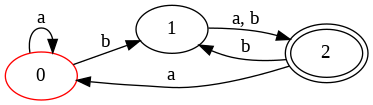

In [23]:
################################
# Creation de 3 etats
################################
# s0 : State (id: 0, initial)
s0 = State(id=0, init=True, fin=False)
# s1 : State (id: 1)
s1 = State(id=1, init=False, fin=False)
# s2 : State (id: 2, final)
s2 = State(id=2, init=False, fin=True)

################################
# Creation de 6 transitions
################################
# t1 : Transition
t1 = Transition(s0,"a",s0)
# t2 : Transition
t2 = Transition(s0,"b",s1)
# t3 : Transition
t3 = Transition(s1,"a",s2)
# t4 : Transition
t4 = Transition(s1,"b",s2)
# t5 : Transition
t5 = Transition(s2,"a",s0)
# t6 : Transition
t6 = Transition(s2,"b",s1)

################################
# Creation de l'automate auto
################################
auto = Automate(
    setTransitions={t1,t2,t3,t4,t5,t6})

################################
# Verification
################################
auto.show() 

2. Créer l'automate $\mathcal{A}$ à l'aide de sa liste de
  transitions et d'états, par exemple à l'aide de l'appel<br>
  `auto1 = Automate({t1,t2,t3,t4,t5,t6}, {s0,s1,s2})`<br>
  puis afficher l'automate obtenu à l'aide de `print` puis à l'aide de `show`.
  Vérifier que l'automate `auto1` est bien
  identique à l'automate `auto`.

In [24]:
################################
# Creation de l'automate
################################
auto1 = Automate(
    setTransitions={t1,t2,t3,t4,t5,t6},
    setStates={s0,s1,s2})

In [25]:
# Afficher par print
print(auto1)

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [2(fin)-b->1]
  [0(init)-b->1]
  [1-a->2(fin)]
  [1-b->2(fin)]
  [0(init)-a->0(init)]
  [2(fin)-a->0(init)]



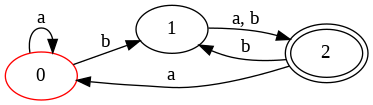

In [26]:
# Afficher par show()
auto1.show()

3. Créer l'automate $\mathcal{A}$ à partir d'un fichier. Pour cela,
  créer un fichier `auto2.txt`, dans lequel sont indiqués les
  listes des états et des transitions, ainsi que l'état initial et
  l'état final, en respectant la syntaxe donnée dans la section
  précédente. Par exemple la liste d'états est décrite par la ligne
  `#E: 0 1 2`.  Utiliser ensuite par exemple l'appel
  `auto2 = Automate.creationAutomate("ExemplesAutomates/auto2.txt")`, puis afficher
  l'automate `auto2` à l'aide de `print` ainsi qu'à l'aide de `show`.

In [27]:
################################
# Creation de l'automate
################################
auto2 = Automate.creationAutomate("ExemplesAutomates/auto2.txt")

In [28]:
# Affichage par print
print(auto2)

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [2(fin)-b->1]
  [0(init)-b->1]
  [1-a->2(fin)]
  [1-b->2(fin)]
  [0(init)-a->0(init)]
  [2(fin)-a->0(init)]



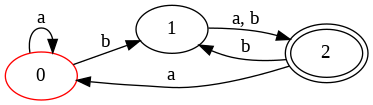

In [29]:
# Affichage par show()
auto2.show()

#### 2.2 Premières manipulations <a class="anchor" id="sec2_2"></a>

1. Appeler la fonction `removeTransition` sur l'automate
  `auto` en lui donnant en argument la transition $(0,a,1)$. Il
  s'agit donc de créer une variable `t` de type
  `Transition` représentant $(0,a,1)$ et d'effectuer l'appel
  `auto.removeTransition(t)`. Observer le résultat sur un
  affichage.  Appeler ensuite cette fonction sur `auto` en lui
  donnant en argument la transition `t1`. Observer le résultat
  sur un affichage. Appeler la fonction `addTransition` sur
  l'automate `auto` en lui donnant en argument la transition
  `t1`. Vérifier que l'automate obtenu est bien le même
  qu'initialement.

In [30]:
################################
# Remove transition (0 a 1) et t1
################################

# (0 a 1)
t = Transition(
    stateSrc=0,
    etiquette="a",
    stateDest=1)
auto.removeTransition(transition=t) 
# False car (0 a 1) est absente de l'automate

# t1
auto.removeTransition(transition=t1) # True
print(auto)

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [2(fin)-b->1]
  [0(init)-b->1]
  [1-a->2(fin)]
  [1-b->2(fin)]
  [2(fin)-a->0(init)]



In [31]:
################################
# Add Transition t1 a auto
################################
auto.addTransition(transition=t1)
print(auto)

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [2(fin)-b->1]
  [0(init)-b->1]
  [1-a->2(fin)]
  [1-b->2(fin)]
  [0(init)-a->0(init)]
  [2(fin)-a->0(init)]



2. Appeler la fonction `removeState` sur l'automate
  `auto` en lui donnant en argument l'état
  `s1`. Observer le résultat. Appeler la fonction
  `addState` sur l'automate `auto` en lui donnant en
  argument l'état `s1`. Créer un état `s0bis` d'identifiant
  $0$ et initial. Appeler la fonction `addState` sur
  `auto` avec `s0bis` comme argument. Observer le résultat.

In [32]:
################################
# Remove State s1 de auto
################################
auto.removeState(state=s1)
print(auto)

Etats :
  0(init)
  2(fin)
Transitions :
  [0(init)-a->0(init)]
  [2(fin)-a->0(init)]



In [33]:
################################
# Add State s1 de auto
################################
auto.addState(state=s1)
print(auto)

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [0(init)-a->0(init)]
  [2(fin)-a->0(init)]



In [34]:
################################
# Creation + Add State s0bis (id: 0, initial)
################################
s0bis = State(id=0, init=True, fin=False)
auto.addState(state=s0bis)
# False car s0bis=s0 et s0 existe deja dans auto
print(auto)

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [0(init)-a->0(init)]
  [2(fin)-a->0(init)]



3. Appeler la fonction `getSetTransitionsFrom` sur
  l'automate `auto1` avec `s1` comme argument. Afficher
  le résultat.

In [35]:
################################
# Get set Transition from s1 a l'Automate auto1
################################
auto1.getSetTransitionsFrom(state=s1)

{[1-a->2(fin)], [1-b->2(fin)]}

### 3. Exercices de base : tests et complétion  <a class="anchor" id="sec3"></a>

1. Donner une définition de la fonction `succ`
  qui, étant donné un ensemble d'états $S$ et une chaîne de caractères
      $a$ (de longueur 1), renvoie l'ensemble des états successeurs de tous les états de $L$ par le caractère $a$. Cette fonction doit généraliser la fonction `succElem` pour qu'elle prenne en paramètre un ensemble d'états au lieu d'un seul état.  Formellement, si $S$ est un ensemble d'états et $a$ une lettre,
  $$succ(S,a) = \bigcup_{s \in S}succ(s,a) = \{s' \in S \mid \mbox{il
    existe } s \in L \mbox{ tel que } s \xrightarrow{a} s'\}.$$

In [36]:
# A faire 

def succ(self, setStates, lettre):
    """ Automate x set[State] x str -> set[State]
        rend l'ensemble des états accessibles à partir de l'ensemble d'états setStates par l'étiquette lettre
    """
    res = set()
    for state in setStates:
        res.update(self.succElem(
            state=state, 
            lettre=lettre))
    return res

Automate.succ = succ

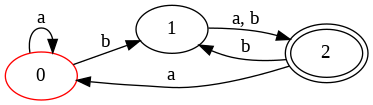

---


In [37]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.succ({s0, s2}, 'b') == {s1}
assert auto1.succ({s0}, 'a') == {s0}
assert auto1.succ({s0, s1}, 'a') == {s0, s2}

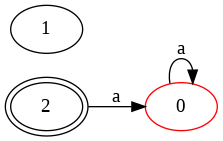

---


In [38]:
# Fournir un autre jeu de tests avec auto
auto.show()
print('---')
assert auto.succ({s0, s2}, 'b') != {s1}
assert auto.succ({s0}, 'a') == {s0}
assert auto.succ({s0, s1}, 'a') != {s0, s2}

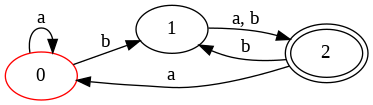

---


In [39]:
# jeu sur auto2 renvoie le meme resultat que auto1
auto2.show()
print('---')
assert auto2.succ({s0, s2}, 'b') == {s1}
assert auto2.succ({s0}, 'a') == {s0}
assert auto2.succ({s0, s1}, 'a') == {s0, s2}

2. Donner une définition de la fonction `accepte`
  qui, étant donné une chaîne de caractères `mot`,
  renvoie un booléen qui vaut vrai si et seulement si `mot` est accepté par l'automate. Attention, noter que l'automate peut ne pas être déterministe.

In [40]:
auto1.succElem(s1,'b')

{2(fin)}

In [41]:
# A faire 

def accepte(self, mot) :
    """ Automate x str -> bool
        rend True si auto accepte mot, False sinon
    """
    StateSet = self.getSetInitialStates()
    
    for i in range(len(mot)):
        StateSet.update(self.succ(StateSet, mot[i]))
        
        if i<len(mot)-1 and State.isFinalIn(StateSet):
            return False

    return State.isFinalIn(StateSet)

Automate.accepte = accepte

False


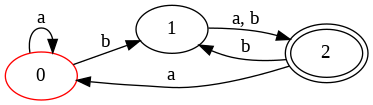

In [43]:
print(auto1.accepte('abab'))
auto1.show()

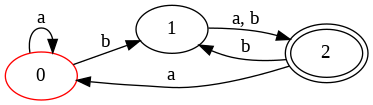

---


In [44]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.accepte('aa') == False
assert auto1.accepte('ab') == False
assert auto1.accepte('aba') == True

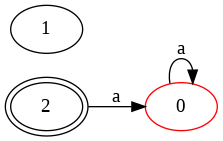

---


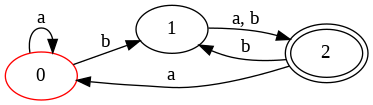

In [45]:
# Fournir un autre jeu de tests

# Jeu sur auto
auto.show()
print('---')
assert auto.accepte('aa') == False
assert auto.accepte('ab') == False
assert auto1.accepte('abab') == False
auto1.show()

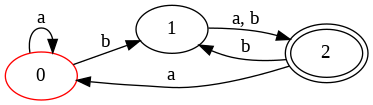

---


In [46]:
# Fournir un autre jeu de tests

# Jeu sur auto2
auto2.show()
print('---')
assert auto2.accepte('aa') == False
assert auto2.accepte('ab') == False
assert auto2.accepte('aba') == True

3. Donner une définition de la fonction `estComplet`
    qui, étant donné un automate `auto` et un ensemble de caractères `Alphabet`
    renvoie un booléen qui vaut vrai si et
    seulement si `auto` est complet par rapport à l'alphabet.
    
    On n'effectuera pas la vérification sur les états non accessibles depuis les états initiaux.

In [47]:
# A faire 

def estComplet(self, Alphabet) :
    """ Automate x set[str] -> bool
        rend True si auto est complet pour les lettres de Alphabet, False sinon
        hyp : les éléments de Alphabet sont de longueur 1
    """
    for state in self.allStates:
        for lettre in Alphabet:
            if(len(self.succElem(state, lettre)) < 1):
                return False
    return True


Automate.estComplet = estComplet

In [48]:
auto

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [0(init)-a->0(init)]
  [2(fin)-a->0(init)]

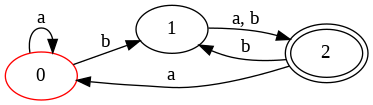

---


In [49]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.estComplet({'a', 'b'}) == True
assert auto1.estComplet({'a', 'c', 'b'}) == False

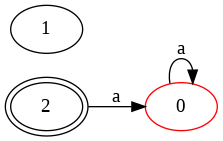

---
Etats :
  0(init)
  1
  2(fin)
Transitions :
  [0(init)-a->0(init)]
  [2(fin)-a->0(init)]



In [50]:
# Fournir un autre jeu de tests
# Jeu sur l'Automate auto 
auto.show()
print('---')
assert auto.estComplet({'a', 'b'}) == False 
# assert auto.estComplet({'a', 'b'}) == True ne marche pas car c'est False
assert auto.estComplet({'a', 'c', 'b'}) == False

print(auto)

4. Donner une définition de la fonction `estDeterministe`
qui, étant donné un automate `auto`,
 renvoie un booléen qui vaut vrai si et seulement si `auto` est déterministe.

In [51]:
# A faire 
# A verifier

def estDeterministe(self) :
    """ Automate -> bool
        rend True si auto est déterministe, False sinon
    """
    if(len(self.getSetInitialStates()) > 1):
            return False
    for state in self.allStates:
        for lettre in self.getAlphabetFromTransitions():
            if(len(self.succElem(state, lettre)) > 1):
                return False
    return True
    
Automate.estDeterministe = estDeterministe

L'appel de fonction `copy.deepcopy(auto)` renvoie un nouvel automate identique à `auto`.

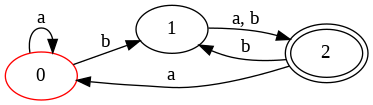

---


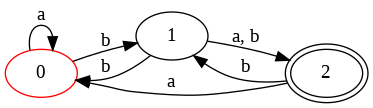

---


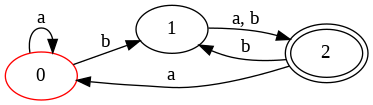

---


In [52]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.estDeterministe() == True

auto1bis = copy.deepcopy(auto1)
#t : Transition
t = Transition(s1, 'b', s0)
auto1bis.addTransition(t)
auto1bis.show()
print('---')
assert auto1bis.estDeterministe() == False

auto1bis.removeTransition(t)
auto1bis.show()
print('---')
assert auto1bis.estDeterministe() == True

In [53]:
# Fournir un autre jeu de tests

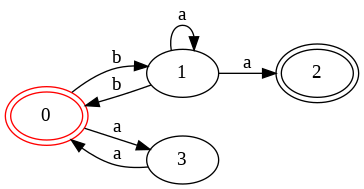

---


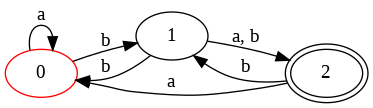

---


In [54]:
# Jeu de test sur auto3
auto3 = Automate.creationAutomate("ExemplesAutomates/auto3.txt")

auto3.show()
print('---')
assert auto3.estDeterministe() == False

auto3bis = copy.deepcopy(auto1)
#t : Transition
t1 = Transition(s1, 'b', s0)
auto3bis.addTransition(t1)
auto3bis.show()
print('---')
assert auto3bis.estDeterministe() == False

5. Donner une définition de la fonction `completeAutomate`
qui, étant donné un automate `auto` et l'ensemble alphabet d'entrée `Alphabet`,
renvoie l'automate complété d'`auto`.
  
Attention, il ne faut pas modifier `auto`, mais construire un nouvel automate.
<br>Il pourra être intéressant d'utiliser l'appel de fonction
`copy.deepcopy(auto)` qui renvoie un nouvel automate identique à `auto`.
<br>On pourra faire appel à la fonction `nextId` afin de construire l'état $\bot$.

In [55]:
# A faire (Sai)

def completeAutomate(self, Alphabet) :
    """ Automate x str -> Automate
        rend l'automate complété de self, par rapport à Alphabet
    """        
    res = copy.deepcopy(self)
    
    # Si l'automate est deja complet
    if self.estComplet(Alphabet) :
        return res
    
    # Creation de l'Automate nextId
    next = State(self.nextId(), False, False)
    res.addState(next)
        
    for state in self.allStates:
        for lettre in Alphabet:
            res.addTransition(Transition(next,lettre,next))
            
            if(len(self.succElem(state, lettre)) == 0):
                res.addTransition(Transition(state, lettre, next))
    return res

Automate.completeAutomate = completeAutomate

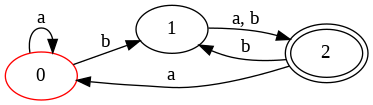

---


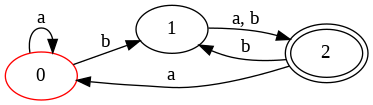

---


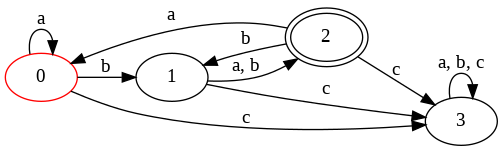

In [56]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant :

auto1.show()
print('---')
assert auto1.estComplet({'a', 'b'}) == True
auto1complet = auto1.completeAutomate({'a', 'b'})
auto1complet.show()
assert auto1complet.estComplet({'a', 'b'}) == True

print('---')
assert auto1.estComplet({'a', 'b', 'c'}) == False
auto1complet = auto1.completeAutomate({'a', 'b', 'c'})
auto1complet.show()
assert auto1complet.estComplet({'a', 'b','c'}) == True

In [57]:
# Fournir un autre jeu de tests

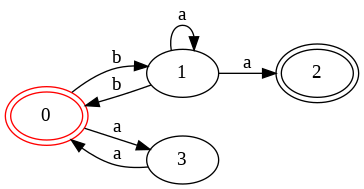

---


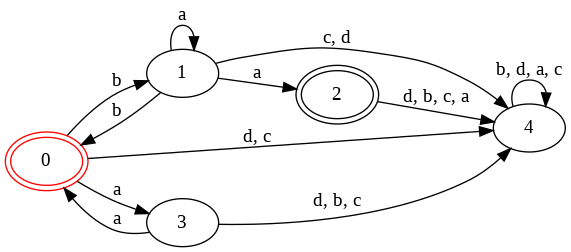

---


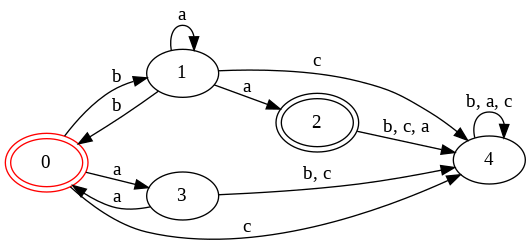

---


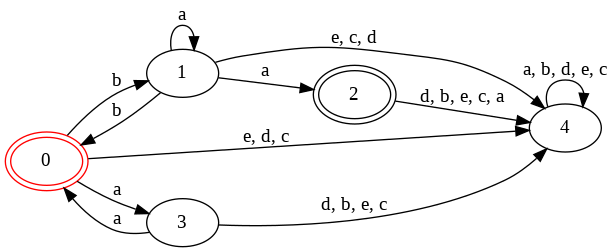

In [58]:
# Jeu de test sur auto3
auto3.show()
print('---')
assert auto3.estComplet({'a', 'b','c','d'}) == False
auto3complet = auto3.completeAutomate({'a', 'b','c','d'})
auto3complet.show()
assert auto3complet.estComplet({'a', 'b','c','d'}) == True

print('---')
assert auto3.estComplet({'a', 'b', 'c'}) == False
auto3complet = auto3.completeAutomate({'a', 'b', 'c'})
auto3complet.show()
assert auto3complet.estComplet({'a', 'b','c'}) == True

print('---')
auto3complet2 = auto3.completeAutomate({'a', 'b','c','d','e'})
auto3complet2.show()
assert auto3complet2.estComplet({'a', 'b','c','d','e'}) == True

### 4. Déterminisation  <a class="anchor" id="sec4"></a>

1. Donner une définition de la fonction `newLabel`
qui, étant donné un ensemble d'états renvoie une *chaîne de caractères* représentant l'ensemble de tous les labels des états.
Par exemple, l'appel de `newLabel` sur un ensemble de 3 états dont les labels sont `'1', '2', '3'` renvoie `'{1,2,3}'`

Afin d'être assuré que l'ordre de parcours de l'ensemble des états n'a pas d'importance, il sera nécessaire de trier par ordre alphabétique la liste des `label` des états. On pourra faire appel à `L.sort()` qui étant donné la liste `L` de chaînes de caractères, la trie en ordre alphabétique.

In [59]:
# A faire

def newLabel(S):
    """ set[State] -> str
    """
    l = []
    for s in S:
        l.append(int(str(s)[0]))
    l.sort()
    return str(set(l))

In [60]:
newLabel({s0,s1})

'{0, 1}'

In [61]:
# On a défini auparavant un automate auto1, voilà un test le concernant :

assert newLabel(auto1.allStates) == '{0, 1, 2}'

In [62]:
# Fournir un autre jeu de tests
s = State(0, True, False, {0})
{t.etiquette for t in auto1.allTransitions}

{'a', 'b'}

La fonction suivante permet de déterminiser un automate. On remarque qu'un état peut servir de clé dans un dictionnaire.

In [64]:
def determinisation(self) :
    """ Automate -> Automate
    rend l'automate déterminisé de self """
    # Ini : set[State]
    Ini = self.getSetInitialStates()
    # fin : bool
    fin = False
    # e : State
    for e in Ini:
        if e.fin:
            fin = True
            
    lab = newLabel(Ini)
    s = State(0, True, fin, lab)
    A = Automate(set())
    A.addState(s)
    Alphabet = {t.etiquette for t in self.allTransitions}
    Etats = dict()
    Etats[s] = Ini
    A.determinisation_etats(self, Alphabet, [s], 0, Etats, set())
    return A

L'automate déterminisé est construit dans `A`. Pour cela la fonction récursive `determinisation_etats` modifie en place l'automate `A`, et prend en outre les paramètres suivants :
- `auto`, qui est l'automate de départ à déterminiser
- `Alphabet` qui contient l'ensemble des lettres étiquetant les transistions de l'automate de départ
- `ListeEtatsATraiter` qui est la liste des états à ajouter et à traiter dans `A` au fur et à mesure que l'on progresse dans `auto`.
- `i` qui est l'indice de l'état en cours de traitement (dans la liste `ListeEtatsATraiter`).
- `Etats` qui est un dictionnaire dont les clés sont les états de `A` et les valeurs associées sont l'ensemble d'états issus de `auto` que cette clé représente.
- `DejaVus` est l'ensemble des labels d'états de `A` déjà vus.

In [249]:
# A faire 

def determinisation_etats(self, auto, Alphabet, ListeEtatsATraiter, i, Etats, DejaVus):
    """ Automate x Automate x set[str] x list[State] x int x dict[State : set[State]], set[str] -> NoneType
    """
    L = []
    DejaVus = DejaVus.union({e.label for e in ListeEtatsATraiter})
    for e in ListeEtatsATraiter:
        for a in Alphabet: 
            d = set()
            for state in Etats[e]:
                d = d.union({t.stateDest for t in auto.getSetTransitionsFrom(state) if t.etiquette == a})

            lab = newLabel(d)
            fin = any([st.fin for st in d])
        
            if (lab in DejaVus) or (d in Etats.values()): 
                new_s = [s for s in Etats if s.label==lab][0]
            else:  
                i+=1
                new_s = State(i, False, fin, lab)
                Etats[new_s] = d
        
            T = Transition(e, a, new_s)
            self.addTransition(T)
        
            if (new_s.label not in DejaVus) and not(new_s in L) and not(new_s.init): 
                L.append(new_s)
    
    if(L != []): 
        return self.determinisation_etats(auto, Alphabet, L, i, Etats, DejaVus)
    else: 
        return None
               
        

Automate.determinisation_etats = determinisation_etats
Automate.determinisation = determinisation

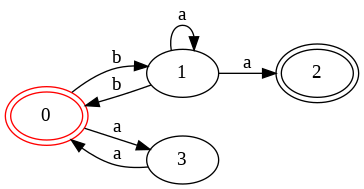

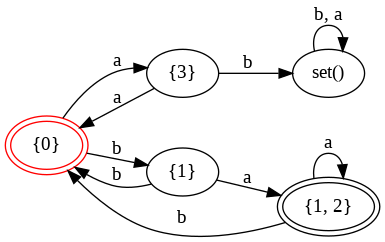

True


In [250]:
# Jeu de test auto3
automate3 = Automate.creationAutomate("ExemplesAutomates/auto3.txt")
automate3.show()
auto_det3 = automate3.determinisation()
auto_det3.show()
print(auto_det3.estDeterministe())
#auto_det3.complementaire(auto_det3.getAlphabetFromTransitions()).show()
#auto_det3.completeAutomate(auto_det3.getAlphabetFromTransitions()).show(2)

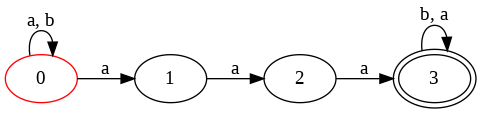

True


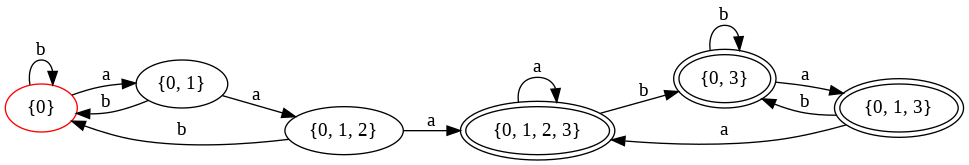

In [251]:
# Voici un test
#automate est l'automate construit plus haut a partir du fichier exempleAutomate.txt
automate = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
automate.show()
auto_det = automate.determinisation()
print(auto_det.estDeterministe())
auto_det.show(2)

In [252]:
#Fournir d'autres jeux de tests

True


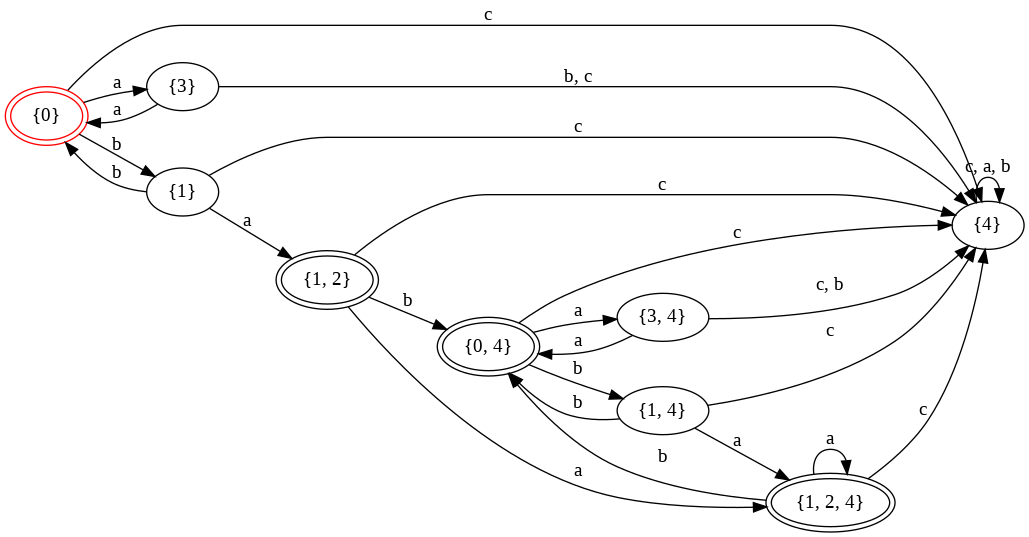

In [253]:
# Jeu de test auto3complet
auto_det3complet = auto3complet.determinisation()
print(auto_det3complet.estDeterministe())
auto_det3complet.show(2)

### 5. Constructions sur les automates réalisant  des opérations sur les langages acceptés <a class="anchor" id="sec5"></a>


#### 5.1 Opérations ensemblistes sur les langages <a class="anchor" id="sec5_1"></a>

1. Donner une définition de la fonction `complementaire` qui, étant donné un automate `auto` et un ensemble de caractères `Alphabet`, renvoie l'automate acceptant la langage complémentaire du langage accepté par `auto`. Ne pas modifier l'automate `auto`, mais construire un nouvel automate.

In [254]:
#A faire

def complementaire(self, Alphabet):
    """ Automate -> Automate
        rend  l'automate acceptant pour langage le complémentaire du langage de self
    """
    res = copy.deepcopy(self)
    
    # Verifier si l'Automate est deterministe et complet
    if not res.estDeterministe() :
        res = res.determinisation()
        
    res.completeAutomate(res.getAlphabetFromTransitions())
        
    for state in res.allStates :
        if state.fin == False :
            state.fin = True
        else :
            state.fin = False
    return res

Automate.complementaire = complementaire   

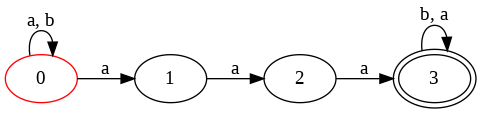

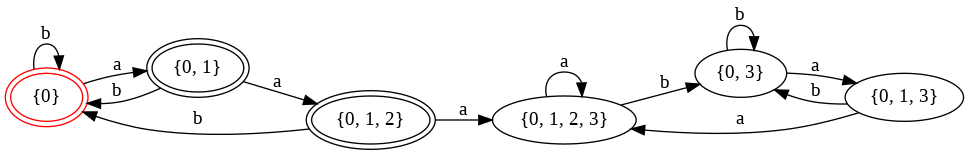

In [255]:
# Voici un test

automate = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
automate.show()

Alphabet = {t.etiquette for t in auto.allTransitions}
auto_compl = automate.complementaire(Alphabet)
auto_compl.show(2)

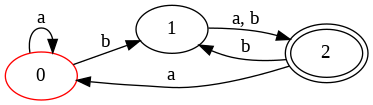

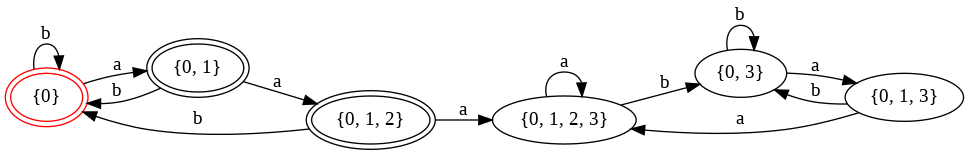

In [256]:
#Fournir d'autres tests
# Jeu de test sur automate2
automate2 = Automate.creationAutomate("ExemplesAutomates/auto2.txt")
automate2.show()

Alphabet2 = {t.etiquette for t in auto2.allTransitions}
auto2_compl = automate.complementaire(Alphabet)
auto2_compl.show(2)

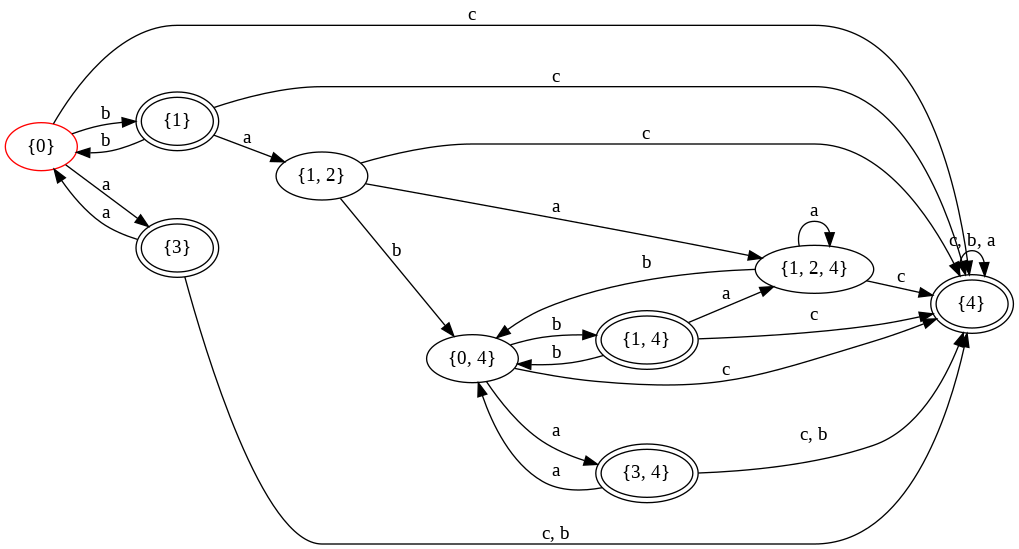

In [257]:
# Jeu de test sur auto3complet
Alphabet3 = {t.etiquette for t in auto3complet.allTransitions}
auto3_compl = auto3complet.complementaire(Alphabet)
auto3_compl.show(2)

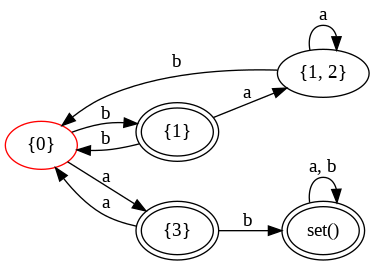

In [258]:
# Jeu de test sur auto3
Alphabet3bis = {t.etiquette for t in auto3.allTransitions}
auto3_complbis = auto3.complementaire(Alphabet)
auto3_complbis.show(2)

2. Donner une définition de la fonction `intersection` qui, étant donné deux automates `auto1` et `auto2`, renvoie l'automate acceptant l'intersection des langages acceptés par `auto1` et `auto2`.

L'automate construit ne doit pas avoir d'état non accessible depuis l'état initial.

In [259]:
#A faire


def intersection(self, auto):
    """ Automate x Automate -> Automate
    rend l'automate acceptant pour langage l'intersection des langages des deux automates
    """
    def find_key(dico, value):
        list_key = [k for k,v in dico.items()]
        list_value = [v for k,v in dico.items()]
        return list_key[list_value.index(value)]
    Auto1 = copy.deepcopy(self)
    Auto2 = copy.deepcopy(auto)
    Alphabet = Auto1.getAlphabetFromTransitions() | Auto2.getAlphabetFromTransitions()
    RawStates = {(s1, s2) for s1 in Auto1.allStates for s2 in Auto2.allStates}
    #print(RawStates)
    InitStates = {(s1, s2) for s1, s2 in RawStates if s1.init and s2.init}
    FinStates = {(s1, s2) for s1, s2 in RawStates if s1.fin and s2.fin}
    #print(InitStates)
    #print(FinStates)
    StateSrc = InitStates | FinStates
    StateDest = InitStates | FinStates
    for a in Alphabet:
        Transition1 = {t for t in Auto1.allTransitions if t.etiquette == a}
        Transition2 = {t for t in Auto2.allTransitions if t.etiquette == a}
        StateSrc = StateSrc | {(t1.stateSrc, t2.stateSrc) for
                                   t1 in Transition1 for
                                   t2 in Transition2}
        StateDest = StateDest | {(t1.stateDest, t2.stateDest) for
                                   t1 in Transition1 for
                                   t2 in Transition2}
    #print(StateSrc)
    #print(StateDest)
    RawStates_invalid = set()
    for s in RawStates:
        if(s in StateSrc and s not in StateDest): RawStates_invalid.add(s)
    RawStates = RawStates - RawStates_invalid
    #print(RawStates)
    States = set()
    DictStates = {}
    Id = 1
    for s1, s2 in RawStates:
        s = (s1, s2)
        if s in InitStates: 
            new_s = State(0, True, 
                         False, "(%s, %s)"%(s1.label, s2.label))
        elif s in FinStates or ((s not in StateSrc) and (s in StateDest)):
            new_s = State(Id, False, 
                         True, "(%s, %s)"%(s1.label, s2.label))
            Id = Id + 1
        else:
            new_s = State(Id, False, 
                         False, "(%s, %s)"%(s1.label, s2.label))
            Id = Id + 1
        States.add(new_s)
        DictStates[new_s] = s
    #print(DictStates)
    Transitions = set()
    for src in DictStates:
        src1, src2 = DictStates[src]
        for a in Alphabet:
            Dest1 = {t.stateDest for t in Auto1.allTransitions 
                 if t.stateSrc == src1 and t.etiquette == a}
            Dest2 = {t.stateDest for t in Auto2.allTransitions 
                 if t.stateSrc == src2 and t.etiquette == a}
            Dest = {(dest1, dest2) for dest1 in Dest1 for dest2 in Dest2}
        for value in Dest:
            dest = find_key(DictStates, value)
            Transitions.add(Transition(src, a, dest))
    Auto = Automate(Transitions)
    return Auto


    
Automate.intersection = intersection

Etats :
  (0, 0)(init)
  (1, 2)
  (0, 2)
  (2, 1)
  (2, 0)
  (2, 2)(fin)
  (1, 1)
Transitions :
  [(0, 0)(init)-b->(1, 1)]
  [(2, 1)-b->(1, 2)]
  [(2, 0)-b->(1, 1)]
  [(2, 2)(fin)-b->(1, 1)]
  [(1, 1)-b->(2, 2)(fin)]
  [(1, 2)-b->(2, 1)]
  [(0, 2)-b->(1, 1)]



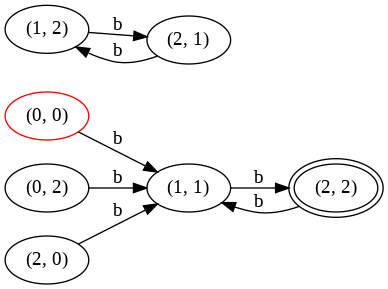

In [260]:
print(auto1.intersection(auto1))
auto1.intersection(auto1).show()

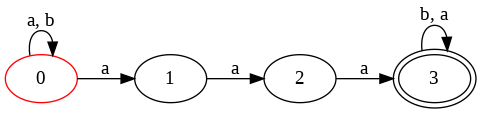

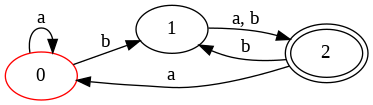

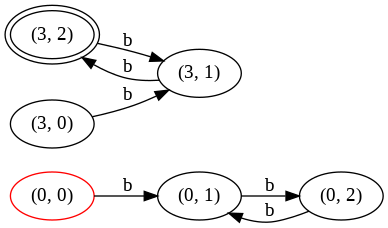

In [261]:
#Un premier test

automate.show()
auto2.show()
inter = automate.intersection(auto2)
inter.show(2)

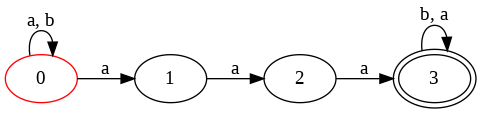

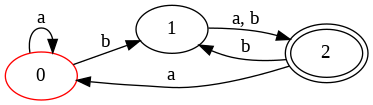

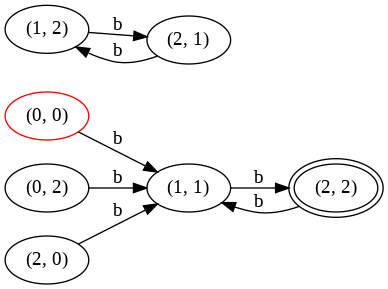

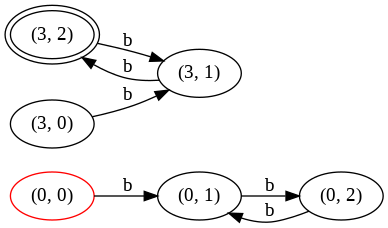

In [263]:
# Fournir d'autres tests
automate.show()
auto2.show()
inter = automate.intersection(auto1)
auto1.intersection(auto1).show()
inter.show(2)
auto3.intersection(auto3complet).show()

3. (Question facultative) Donner une définition de la fonction `union` qui, étant donné deux automates `auto1` `auto2`, renvoie l'automate acceptant comme langage l'union des langages acceptés par `auto1` et `auto2`.

In [264]:
#A faire par l'étudiant

def union (self, auto):
    """ Automate x Automate -> Automate
    rend l'automate acceptant pour langage l'union des langages des deux automates
    """
    if self.allStates & auto.allStates == set(): Auto = Automate(self.allTransitions | auto.allTransitions)
    else:
      if not(self.estComplet(self.getAlphabetFromTransitions())): self.completeAutomate(self.getAlphabetFromTransitions())
      if not(auto.estComplet(self.getAlphabetFromTransitions())): auto.completeAutomate(self.getAlphabetFromTransitions())
      def find_key(dico, value):
        list_key = [k for k,v in dico.items()]
        list_value = [v for k,v in dico.items()]
        return list_key[list_value.index(value)]
      Alphabet = self.getAlphabetFromTransitions() | auto.getAlphabetFromTransitions()
      RawStates = {(s1, s2) for s1 in self.allStates for s2 in auto.allStates}
      #print(RawStates)
      InitStates = {(s1, s2) for s1, s2 in RawStates if s1.init and s2.init}
      FinStates = {(s1, s2) for s1, s2 in RawStates if s1.fin or s2.fin}
      #print(InitStates)
      #print(FinStates)
      StateSrc = InitStates | FinStates
      StateDest = InitStates | FinStates
      for a in Alphabet:
        Transition1 = {t for t in self.allTransitions if t.etiquette == a}
        Transition2 = {t for t in auto.allTransitions if t.etiquette == a}
        StateSrc = StateSrc | {(t1.stateSrc, t2.stateSrc) for
                                    t1 in Transition1 for
                                    t2 in Transition2}
        StateDest = StateDest | {(t1.stateDest, t2.stateDest) for
                                    t1 in Transition1 for
                                    t2 in Transition2}
      #print(StateSrc)
      #print(StateDest)
      RawStates_invalid = set()
      for s in RawStates:
        if not(s in InitStates or s in FinStates):
          if(s not in StateSrc): RawStates_invalid.add(s)
          if(s not in StateDest): RawStates_invalid.add(s)
      RawStates = RawStates - RawStates_invalid
      #print(RawStates)
      States = set()
      DictStates = {}
      Id = 1
      for s1, s2 in RawStates:
        s = (s1, s2)
        if s in InitStates: 
          new_s = State(0, True, 
                        False, "(%s, %s)"%(s1.label, s2.label))
        elif s in FinStates:
          new_s = State(Id, False, 
                        True, "(%s, %s)"%(s1.label, s2.label))
          Id = Id + 1
        else:
          new_s = State(Id, False, 
                        False, "(%s, %s)"%(s1.label, s2.label))
          Id = Id + 1
        States.add(new_s)
        DictStates[new_s] = s
      Transitions = set()
      for src in DictStates:
        src1, src2 = DictStates[src]
        for a in Alphabet:
          Dest1 = {t.stateDest for t in self.allTransitions 
                  if t.stateSrc == src1 and t.etiquette == a}
          Dest2 = {t.stateDest for t in auto.allTransitions 
                  if t.stateSrc == src2 and t.etiquette == a}
          Dest = {(dest1, dest2) for dest1 in Dest1 for dest2 in Dest2}
          for value in Dest:
            dest = find_key(DictStates, value)
            Transitions.add(Transition(src, a, dest))
      Auto = Automate(Transitions)
    return Auto

Automate.union = union  


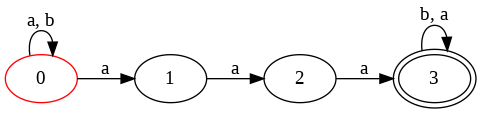

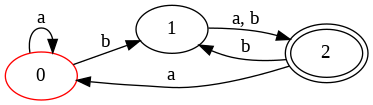

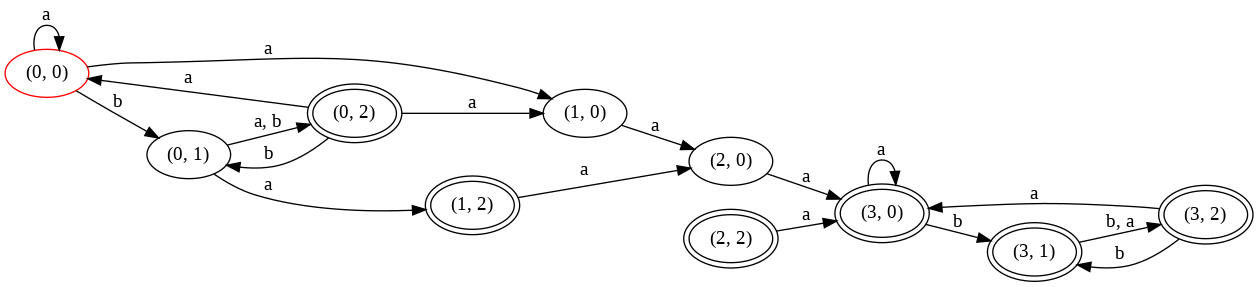

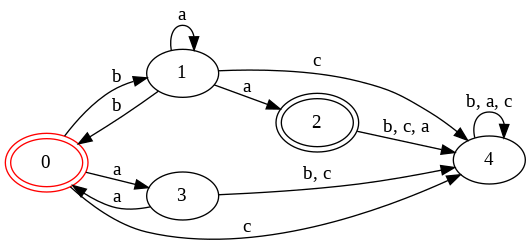

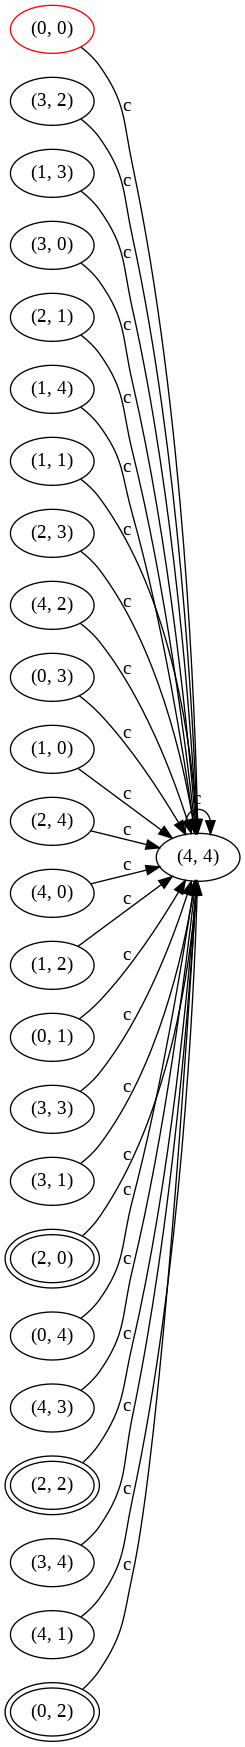

In [266]:
#Un premier test

automate.show()
auto2.show()
uni = automate.union(auto2)
uni.show(2)
auto3complet.show()
auto3complet.intersection(auto3complet).show()

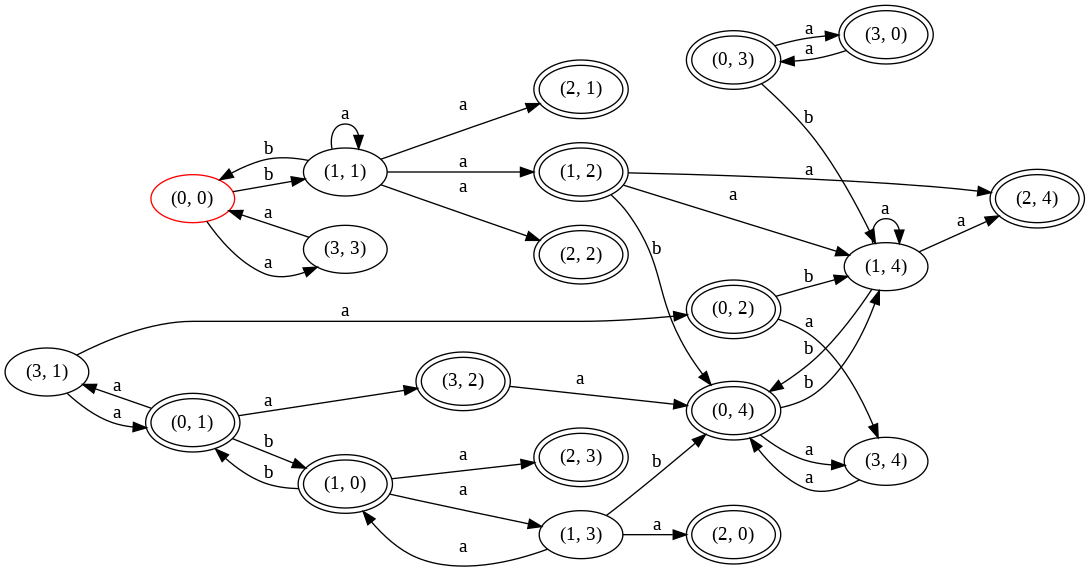

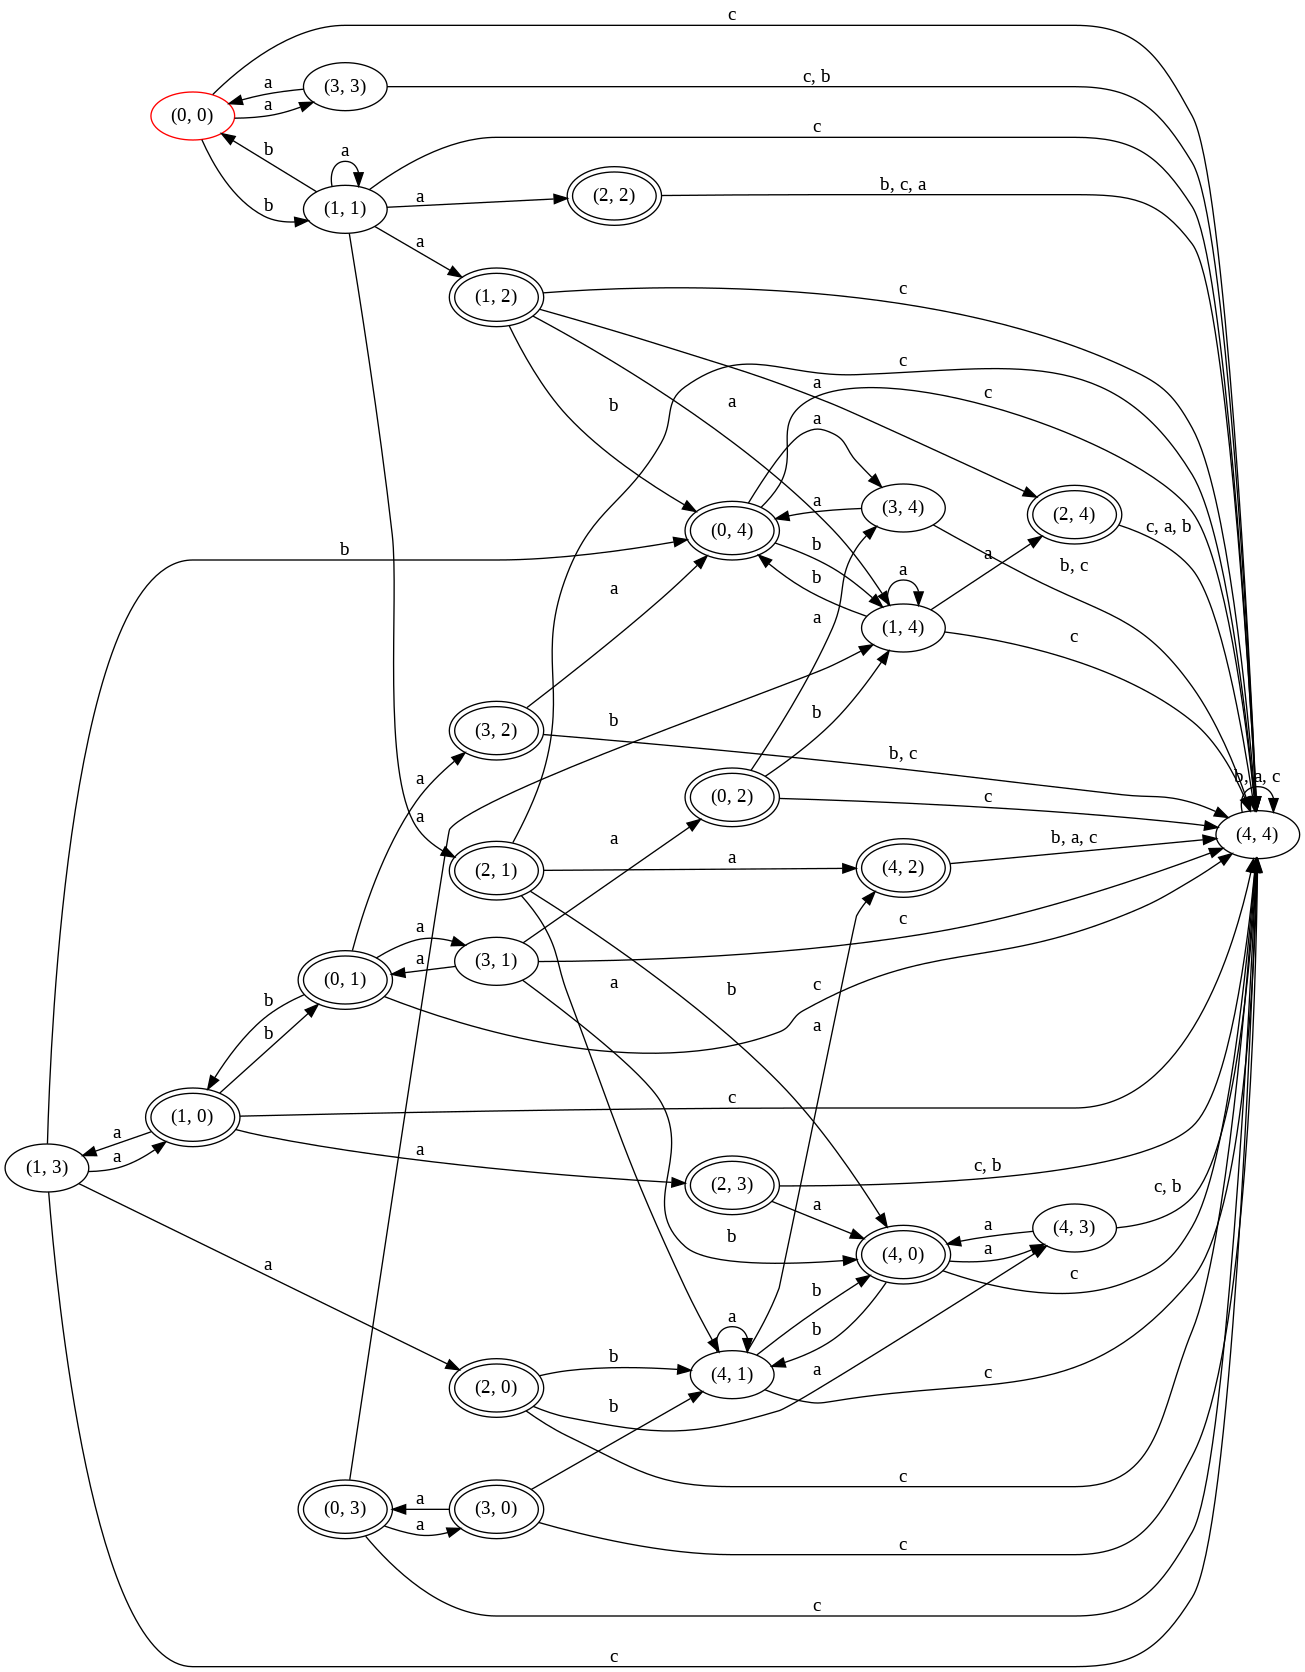

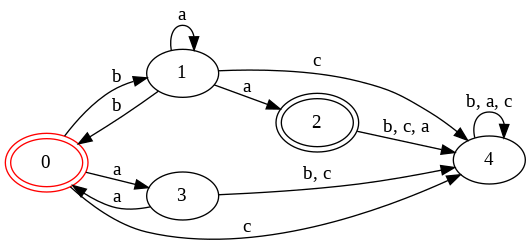

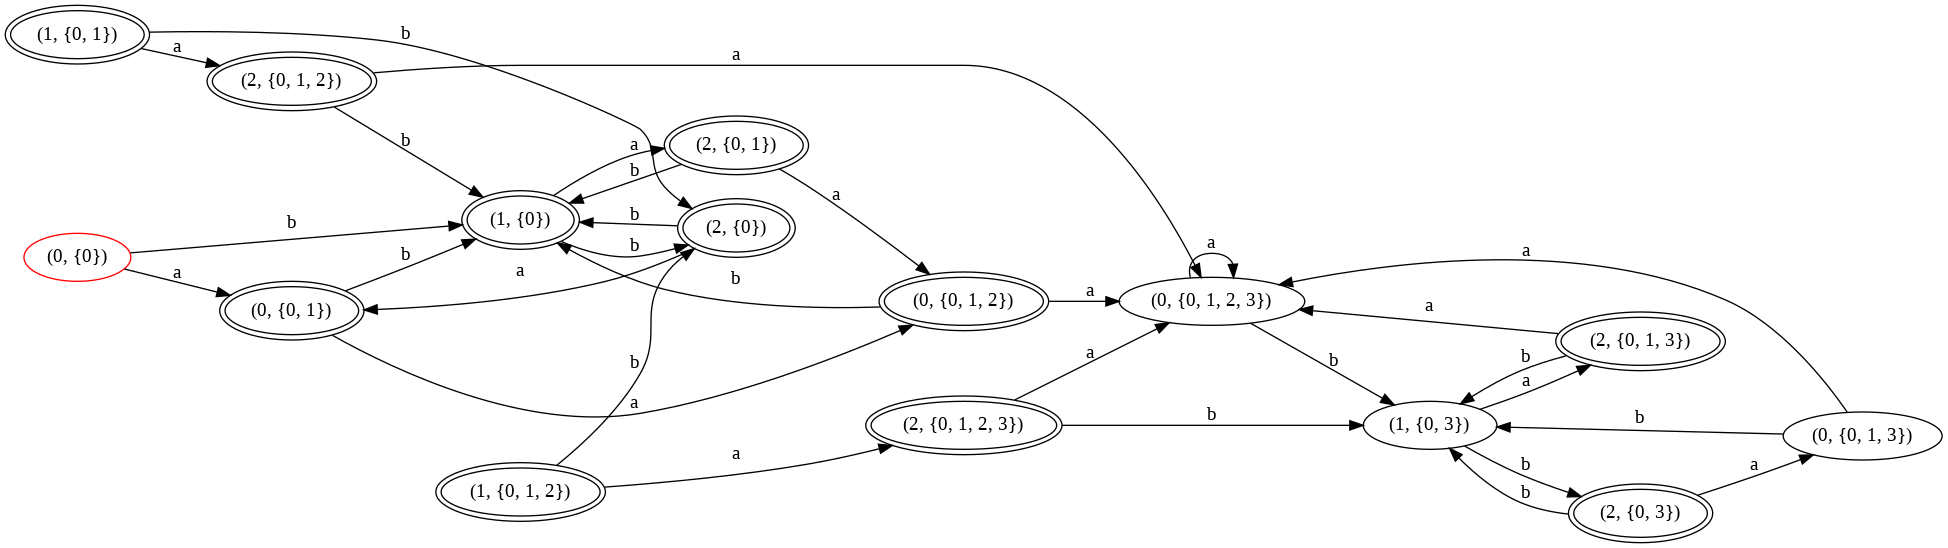

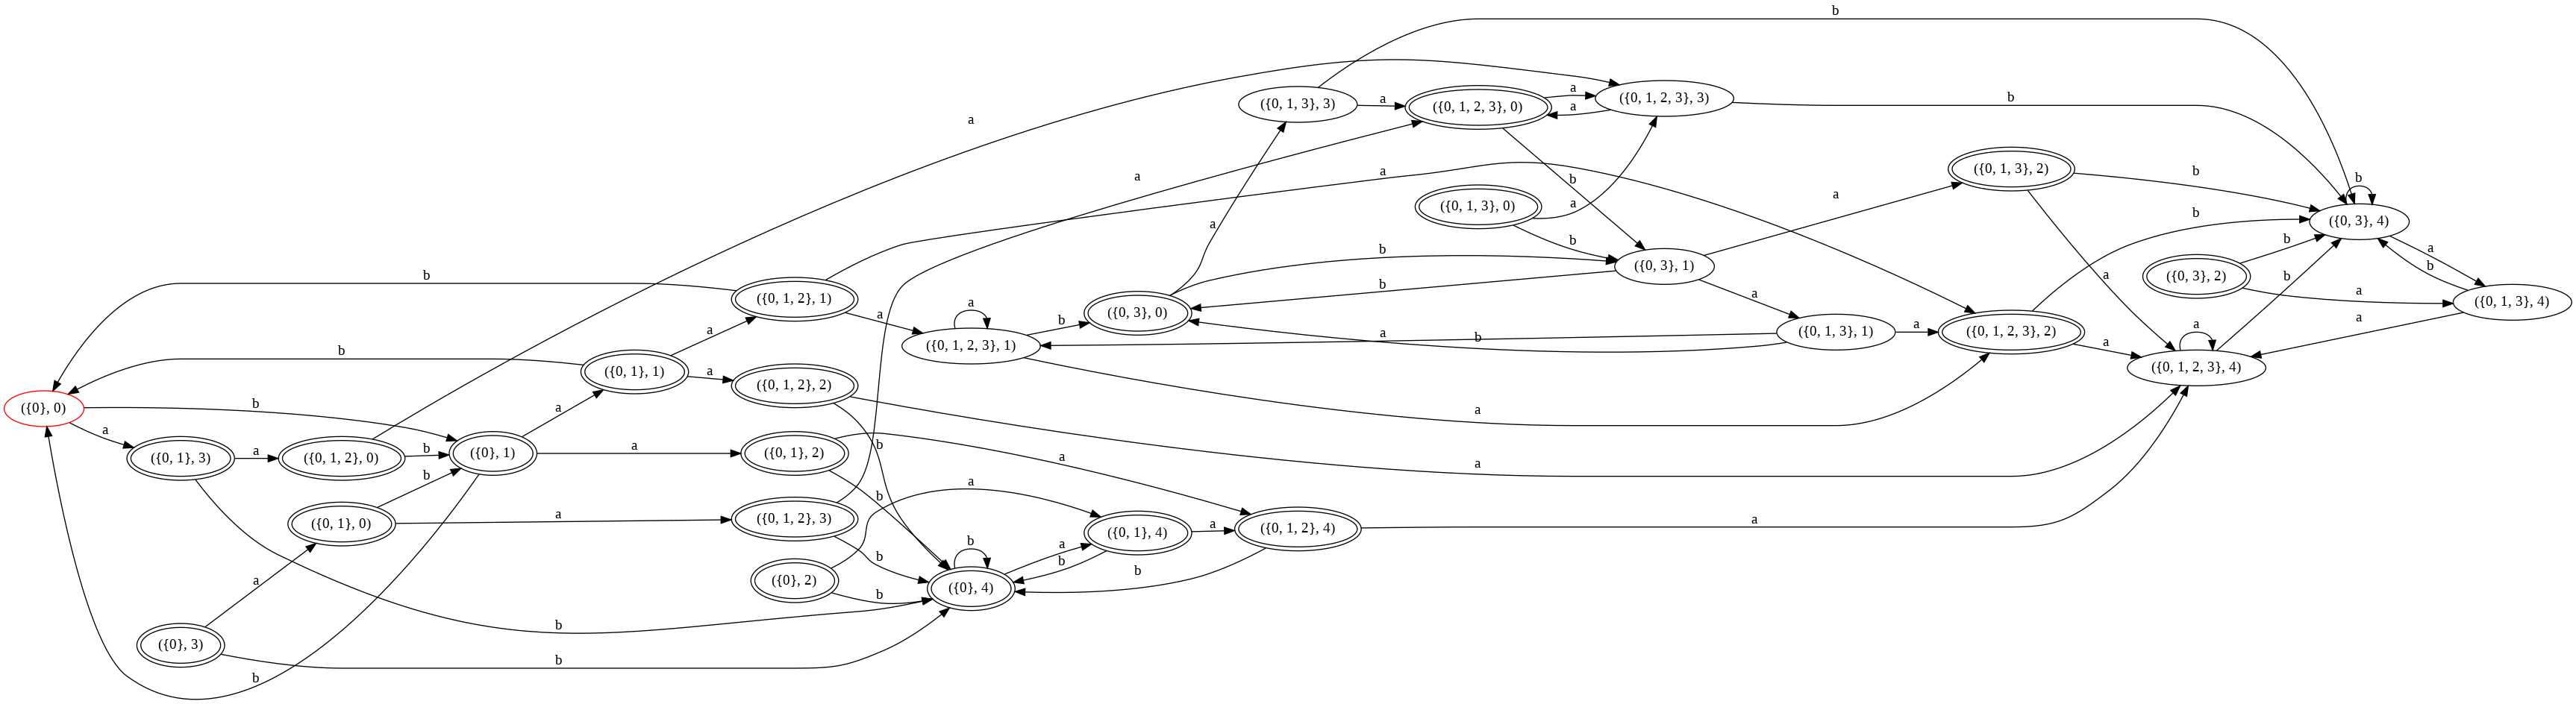

In [267]:
# D'autres jeu de tests
auto3.union(auto3complet).show()
auto3complet.union(auto3complet).show()
auto3complet.show()

auto1.union(auto_compl).show()
auto_compl.union(auto3complet).show()

#### 5.2 Opérations rationnelles sur les langages <a class="anchor" id="sec5_2"></a>

Programmer *une des deux* méthodes suivantes:

1. Donner une définition de la fonction `concatenation` qui, étant donné deux automates `auto1` et `auto2`, renvoie l'automate acceptant comme langage la concaténation des langages acceptés par `auto1` et `auto2`.

2. Donner une définition de la fonction `etoile` qui, étant donné un automate `auto`, renvoie l'automate acceptant comme langage l'étoile du langages accepté par `auto`.

In [268]:
# A faire



def concatenation (self, auto):
    """ Automate x Automate -> Automate
    rend l'automate acceptant pour langage la concaténation des langages des deux automates
    """
    Auto1 = copy.deepcopy(self)
    Auto2 = copy.deepcopy(auto)
    for s in Auto2.allStates: s.id = s.id + len(Auto1.allStates)
    Alphabet = Auto1.getAlphabetFromTransitions() | Auto2.getAlphabetFromTransitions()
    Transitions1 = {t for t in Auto1.allTransitions}
    Transitions2 = {t for t in Auto2.allTransitions}
    Transitions = Transitions1 | Transitions2
    ToFinal1 = [t for t in Transitions1 if t.stateDest.fin]
    for t in ToFinal1:
      for dest in Auto2.getSetInitialStates():
        Transitions.add(Transition(t.stateSrc, t.etiquette, dest))
    for t in Transitions:
      if t.stateSrc in Auto1.getSetFinalStates(): t.stateSrc.fin = False
      if t.stateDest in Auto1.getSetFinalStates(): t.stateDest.fin = False
    States = Auto1.allStates | Auto2.allStates
    Auto = Automate(Transitions)
    if Auto1.getSetInitialStates() & Auto1.getSetFinalStates() == set():
      #InitStates = self.getSetInitialStates()
      for t in Auto.allTransitions:
        if t.stateSrc in Auto2.getSetInitialStates(): t.stateSrc.init = False
        if t.stateDest in Auto2.getSetInitialStates(): t.stateDest.init = False
    #else:
      #InitStates = self.getSetInitialStates() | auto.getSetInitialStates()
    return Auto

Automate.concatenation = concatenation

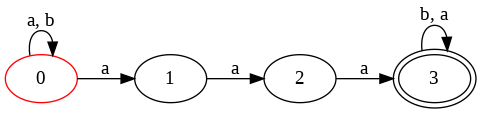

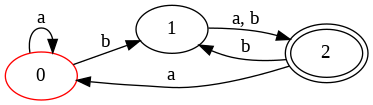

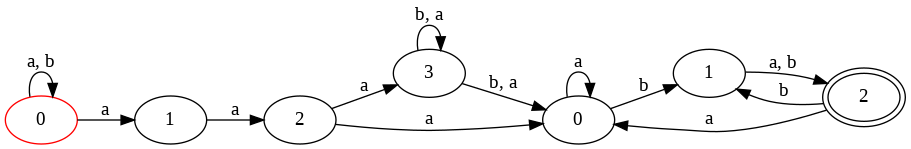

In [269]:
#Un premier test

automate.show()
auto2.show()
concat = automate.concatenation(auto2)
concat.show(2)

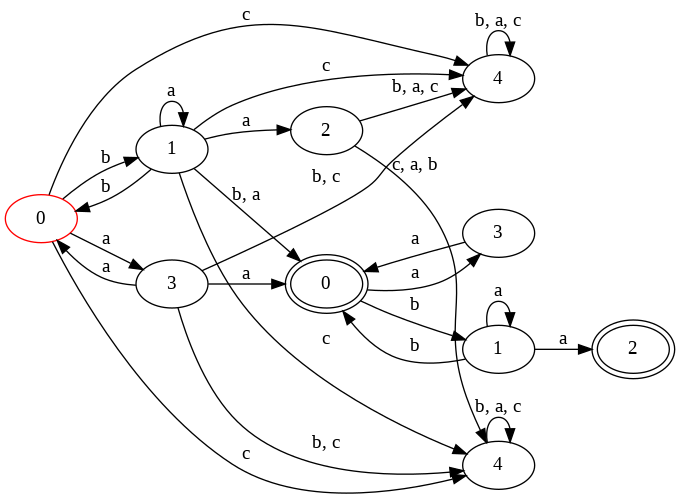

In [270]:
#Fournir un autre jeu de test
auto3complet.concatenation(auto3complet).show()

In [271]:
def etoile (self):
    """ Automate  -> Automate
    rend l'automate acceptant pour langage l'étoile du langage de a
    """
    auto = copy.deepcopy(self)
    ToFinal = [t for t in auto.allTransitions if t.stateDest.fin]
    for t in ToFinal:
      for dest in auto.getSetInitialStates():
        auto.allTransitions.add(Transition(t.stateSrc, t.etiquette, dest))
    return auto
  
Automate.etoile = etoile

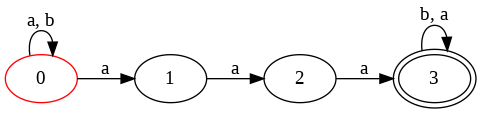

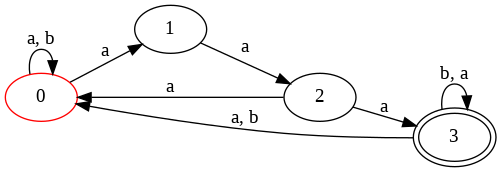

In [272]:
#Un premier test

automate.show()
autoetoile = automate.etoile()
autoetoile.show()

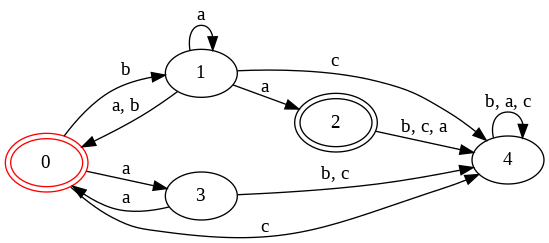

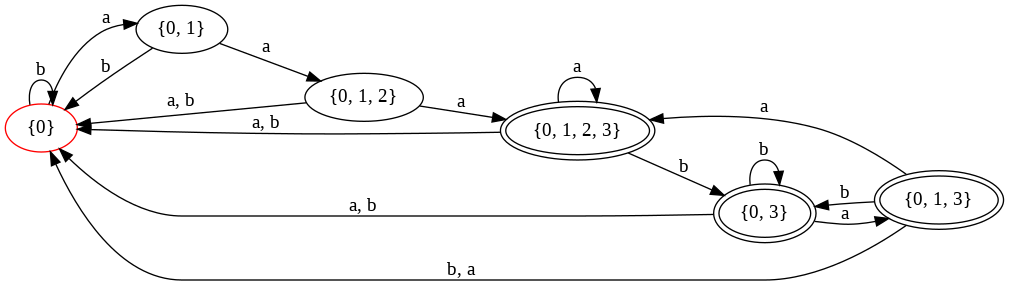

In [273]:
#Fournir un autre jeu de tests
auto3complet.etoile().show()
auto_compl.complementaire(auto_compl.getAlphabetFromTransitions()).etoile().show()

---